Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [75]:
import random
from itertools import accumulate
import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [114]:
UNIVERSE_SIZE = 10000
NUM_SETS = 1000
DENSITY = 0.2
MAX_STEPS = 10000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [115]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)



## Helper Functions

In [110]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def fitness(solution: np.ndarray):
    return (valid(solution), -cost(solution))

#basic tweak
def tweak(solution):
    new_solution = solution.copy()
    pos = random.randrange(NUM_SETS)
    new_solution[pos] = not new_solution[pos]
    return new_solution

#a basic tweak like the one above wouldn' t be able to explore all the solutions because
#when a set is turned from false to true the solution wouldn't be considered, because it costs more
#than the previous solution
def bigtweak(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.5:
        index = random.randrange(NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution

def biggertweak(solution):
    mask = np.random.random(NUM_SETS) < 0.01
    new_solution = np.logical_xor(solution, mask)
    return new_solution
    

## Have Fun!

In [116]:
# A dumb solution of "all" sets (istance 3)
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(4277252.947336256))

In [117]:
# A random solution with random 40% of the sets (istance 3)
solution = rng.random(NUM_SETS) < .4
valid(solution), cost(solution)

(np.True_, np.float64(1665029.645795954))

## RMHC

## Istance 1

  0%|          | 0/100 [00:00<?, ?it/s]

(np.True_, np.float64(295.39448173242357))

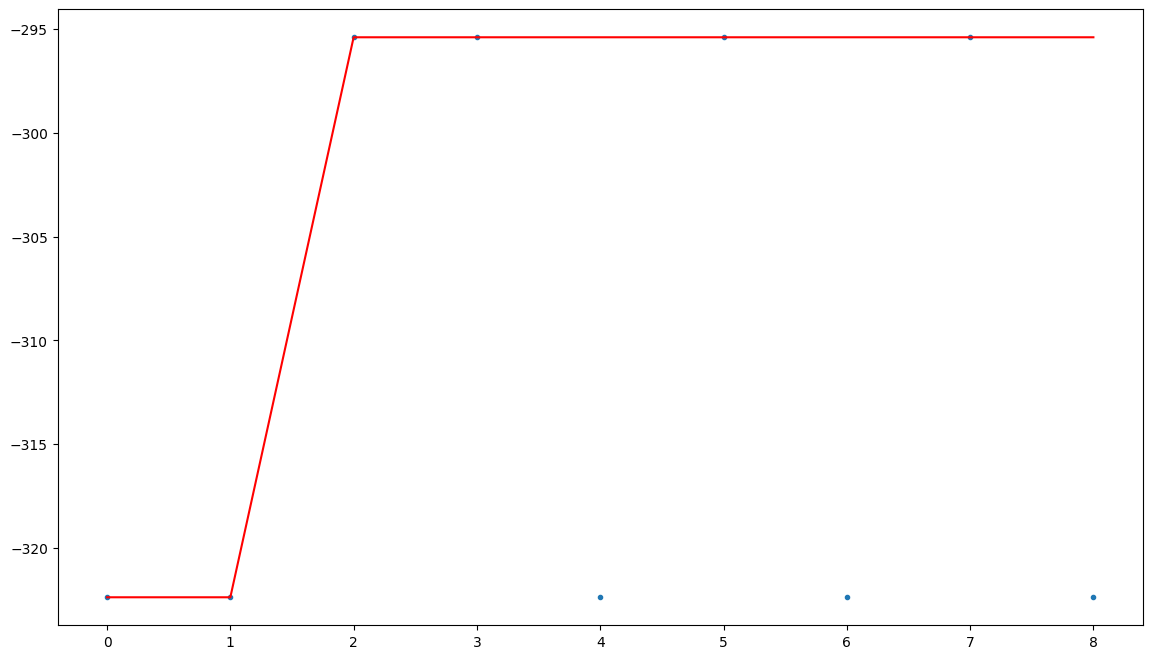

In [56]:
#istance 1
solution = rng.random(NUM_SETS) < .5
while(valid(solution) == np.False_):
    solution = rng.random(NUM_SETS) < .5
f = fitness(solution)
history = [f[1]]
for i in tqdm(range(MAX_STEPS)):   
    new_solution = bigtweak(solution)
    f = fitness(new_solution)
    if f[0] == np.True_:
        history.append(f[1])
        #check the cost
        if cost(new_solution) < cost(solution):
            solution = new_solution
            
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

valid(solution), cost(solution)

## Istance 2

  0%|          | 0/2000 [00:00<?, ?it/s]

(np.True_, np.float64(6698.966168519496))

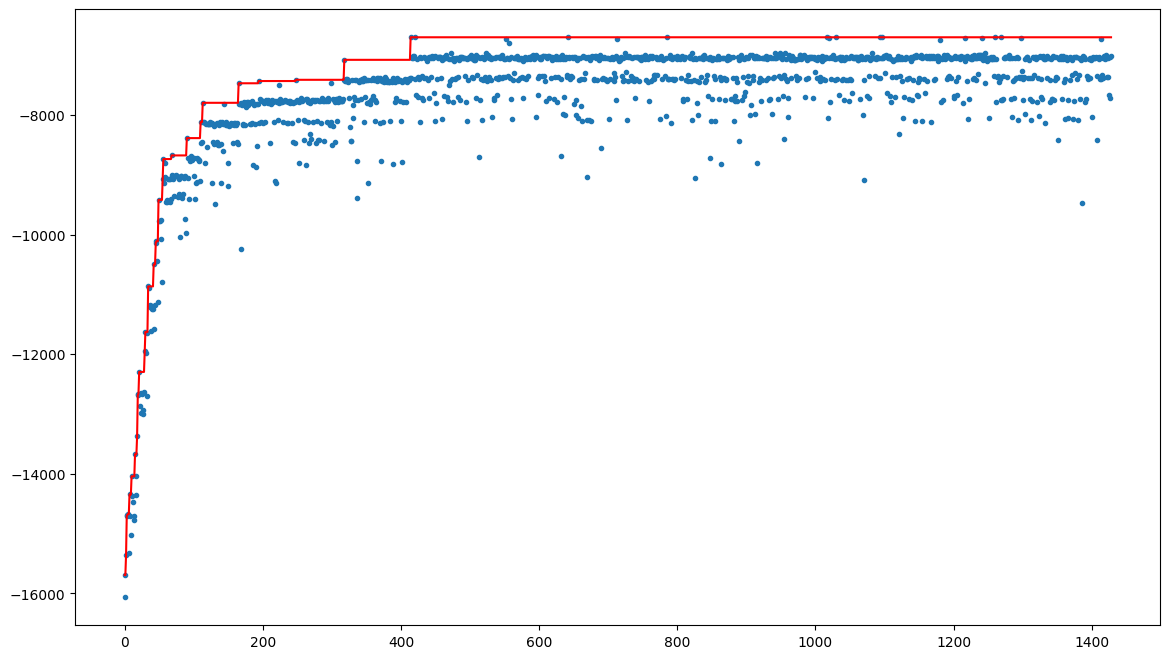

In [64]:
#istance 2
solution = rng.random(NUM_SETS) < .5
while(valid(solution) == np.False_):
    solution = rng.random(NUM_SETS) < .5
f = fitness(solution)
history = [f[1]]
for i in tqdm(range(MAX_STEPS)):   
    new_solution = bigtweak(solution)
    f = fitness(new_solution)
    if f[0] == np.True_:
        history.append(f[1])
        #check the cost
        if cost(new_solution) < cost(solution):
            solution = new_solution
            
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

valid(solution), cost(solution)

## Istance 3

  0%|          | 0/10000 [00:00<?, ?it/s]

(np.True_, np.float64(131238.86390528939))

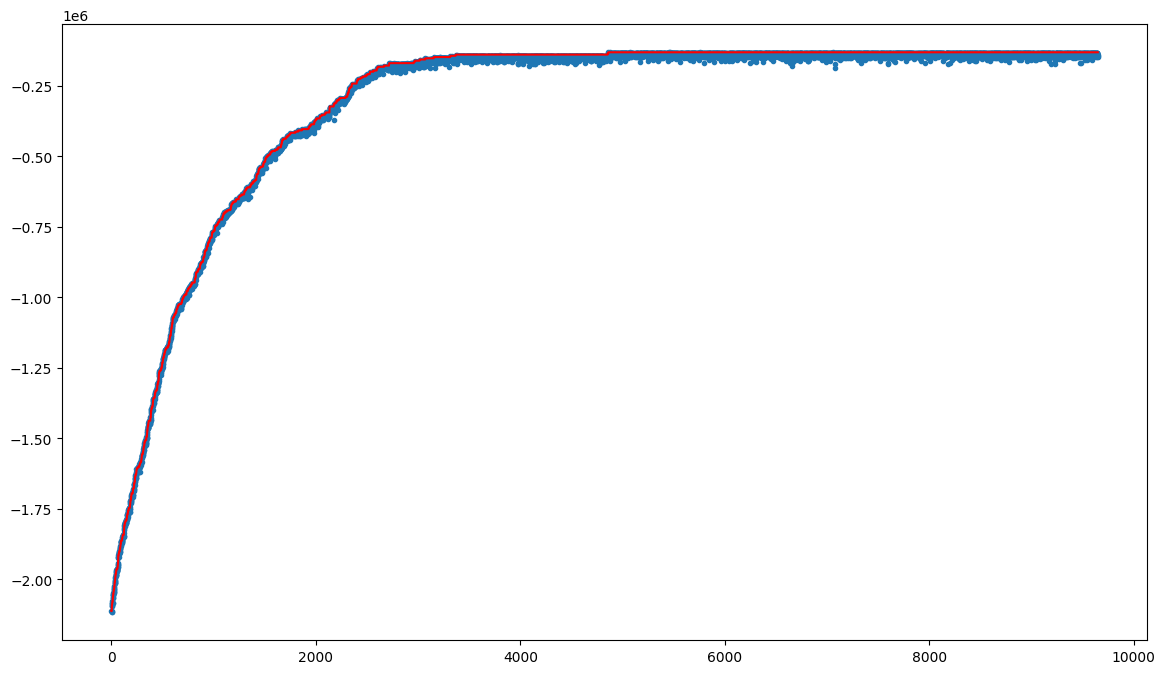

In [84]:
#istance 3
solution = rng.random(NUM_SETS) < .5
while(valid(solution) == np.False_):
    solution = rng.random(NUM_SETS) < .5
f = fitness(solution)
history = [f[1]]
for i in tqdm(range(MAX_STEPS)):   
    new_solution = bigtweak(solution)
    f = fitness(new_solution)
    if f[0] == np.True_:
        history.append(f[1])
        #check the cost
        if cost(new_solution) < cost(solution):
            solution = new_solution
            
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

valid(solution), cost(solution)

## Istance 4

  0%|          | 0/1000 [00:00<?, ?it/s]

(np.True_, np.float64(106332221.71053267))

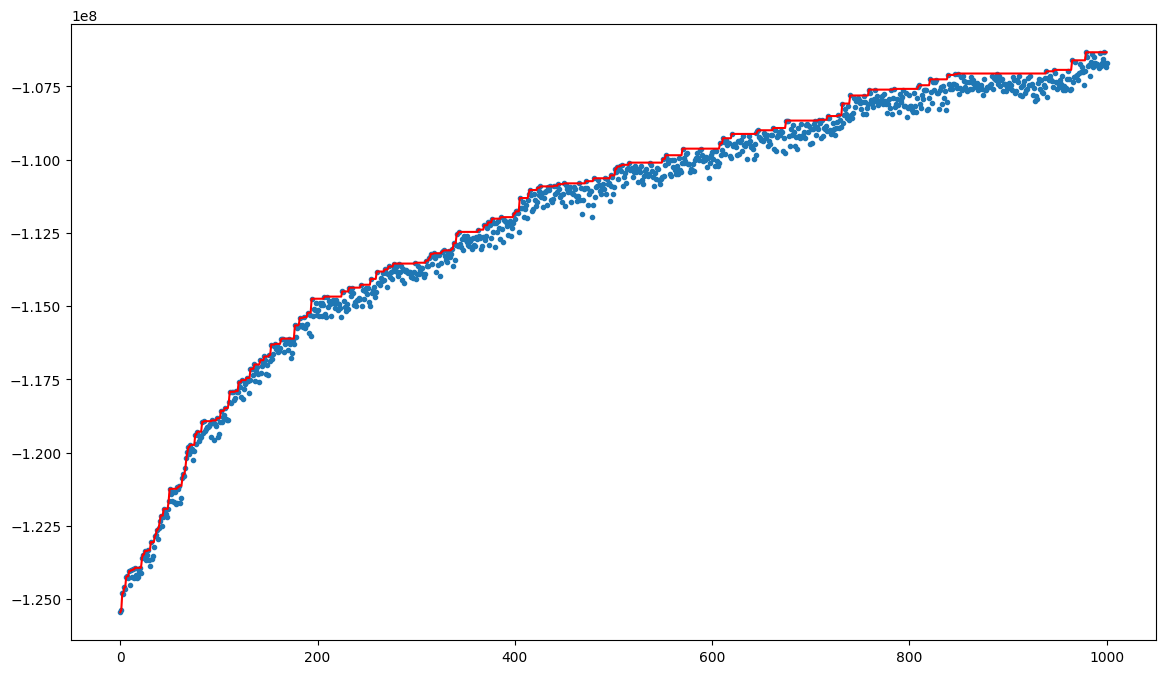

In [91]:
#istance 4
solution = rng.random(NUM_SETS) < .5
while(valid(solution) == np.False_):
    solution = rng.random(NUM_SETS) < .5
f = fitness(solution)
history = [f[1]]
for i in tqdm(range(MAX_STEPS)):   
    new_solution = biggertweak(solution)
    f = fitness(new_solution)
    if f[0] == np.True_:
        history.append(f[1])
        #check the cost
        if cost(new_solution) < cost(solution):
            solution = new_solution
            
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

valid(solution), cost(solution)

## Istance 5

  0%|          | 0/1000 [00:00<?, ?it/s]

(np.True_, np.float64(226399142.49839652))

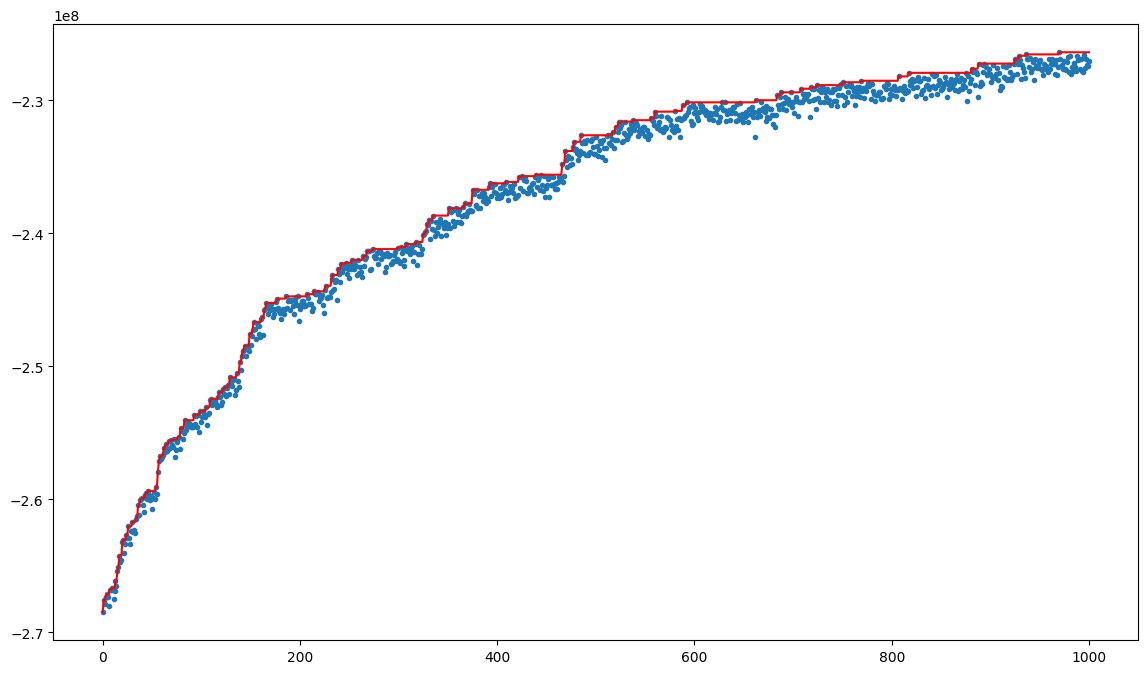

In [100]:
#istance 5
solution = rng.random(NUM_SETS) < .5
while(valid(solution) == np.False_):
    solution = rng.random(NUM_SETS) < .5
f = fitness(solution)
history = [f[1]]
for i in tqdm(range(MAX_STEPS)):   
    new_solution = biggertweak(solution)
    f = fitness(new_solution)
    if f[0] == np.True_:
        history.append(f[1])
        #check the cost
        if cost(new_solution) < cost(solution):
            solution = new_solution
            
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

valid(solution), cost(solution)

## Istance 6 20000 steps

  0%|          | 0/20000 [00:00<?, ?it/s]

(np.True_, np.float64(304518556.6603475))

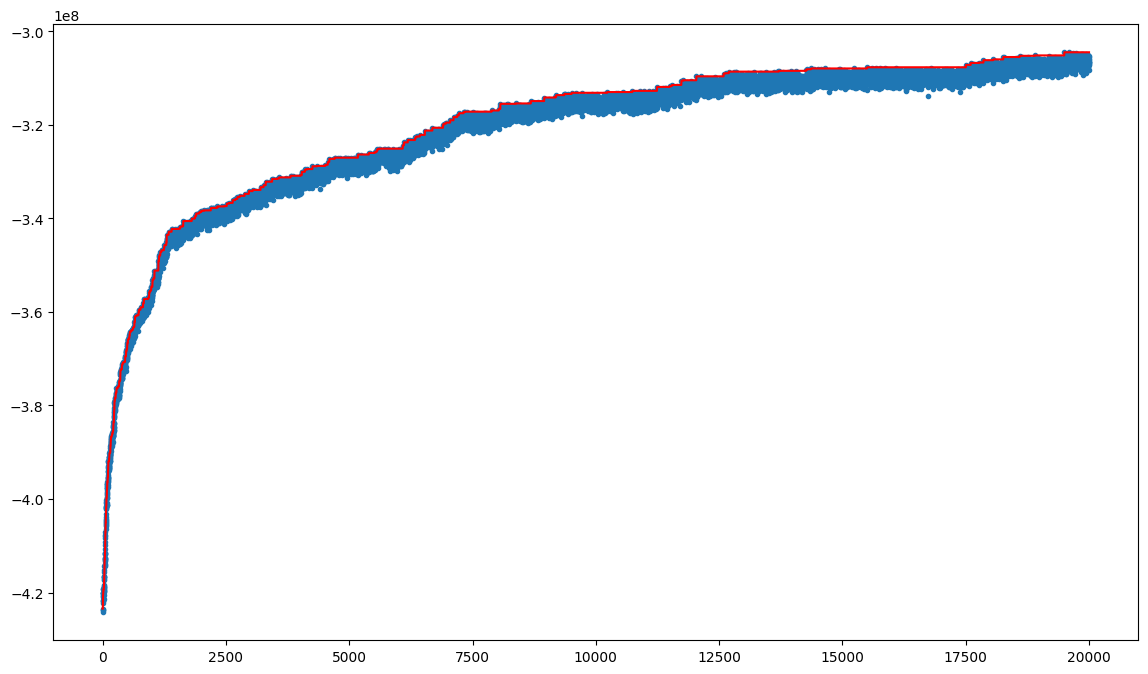

In [107]:
#istance 6
solution = rng.random(NUM_SETS) < .5
while(valid(solution) == np.False_):
    solution = rng.random(NUM_SETS) < .5
f = fitness(solution)
history = [f[1]]
for i in tqdm(range(MAX_STEPS)):   
    new_solution = biggertweak(solution)
    f = fitness(new_solution)
    if f[0] == np.True_:
        history.append(f[1])
        #check the cost
        if cost(new_solution) < cost(solution):
            solution = new_solution
            
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

valid(solution), cost(solution)

## Istance 6 1000 steps

  0%|          | 0/1000 [00:00<?, ?it/s]

(np.True_, np.float64(354651352.9756517))

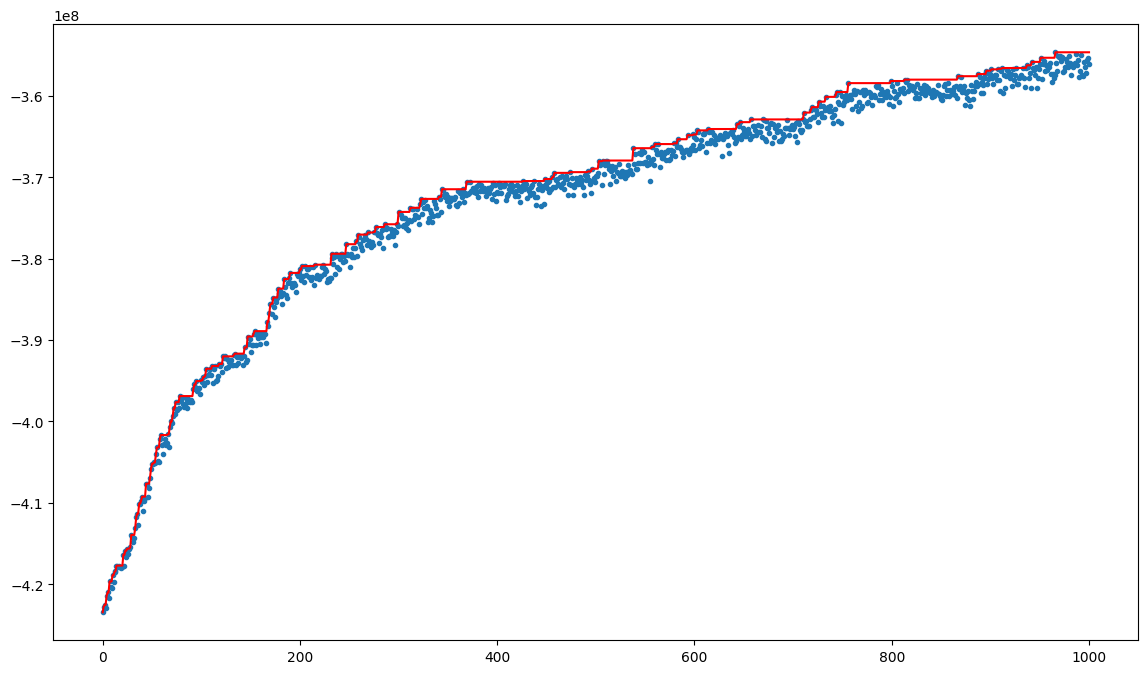

In [111]:
#istance 6
solution = rng.random(NUM_SETS) < .5
while(valid(solution) == np.False_):
    solution = rng.random(NUM_SETS) < .5
f = fitness(solution)
history = [f[1]]
for i in tqdm(range(MAX_STEPS)):   
    new_solution = biggertweak(solution)
    f = fitness(new_solution)
    if f[0] == np.True_:
        history.append(f[1])
        #check the cost
        if cost(new_solution) < cost(solution):
            solution = new_solution
            
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

valid(solution), cost(solution)